In [23]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#pip install emoji
#pip install VaderSentiment
from emoji import UNICODE_EMOJI
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from google.colab import drive
from textblob import TextBlob
from textblob import Word
#upload files
#from google.colab import files
#uploaded = files.upload()

In [24]:
pathcovid = 'retrycovidtweets.csv'
pathprecovid= 'precovidtweet.csv'
pathlockdown= 'shutdown.csv'
 
covidtweets = pd.read_csv(pathcovid) 
precovidtweets = pd.read_csv(pathprecovid)
lockdowntweets = pd.read_csv(pathlockdown)

In [25]:
df = pd.concat([covidtweets, precovidtweets, lockdowntweets], axis=0)
df.head()

,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
0,@Skineez,SKINEEZ SKINCAREWEAR®,Safely socializing in the garden.... We're all trying to keep everyone safe. (Well done @Delta) #SundayMorning #mask #MaskUp #garden #skincare #summer #Health #WearAMask #SocialDistancing #Melbourne #weekend https://t.co/Sna8wuk1iv,0,0,2,1596374229000,02 Aug 2020,Skineez/status/1289913124926234625,https://twitter.com/search?q=(snack%20OR%20snacks%20OR%20blanket%20OR%20blankets%20OR%20masks%20OR%20mask%20OR%20safety)%20(%40Delta)%20until%3A2020-11-19%20since%3A2020-02-15&src=typed_query,SundayMorning | mask | MaskUp | garden | skincare | summer | Health | WearAMask | SocialDistancing | Melbourne | weekend
1,@thederekmurrell,Derek Murrell,"These companies are going crazy. @delta @AmericanAir and others, banning their customers for little mask upsets while packing people in like sardines. #NoBailout. https://t.co/guPpsx2rJz",0,0,1,1598062235000,22 Aug 2020,thederekmurrell/status/1296993136766574597,https://twitter.com/search?q=(snack%20OR%20snacks%20OR%20blanket%20OR%20blankets%20OR%20masks%20OR%20mask%20OR%20safety)%20(%40Delta)%20until%3A2020-11-19%20since%3A2020-02-15&src=typed_query,NoBailout
2,@AmblerJ17,Jeff Jones,@RichDuszak @Delta Good move Delta. Pretty simple act. Wear the damn mask!,0,0,0,1596381728000,02 Aug 2020,AmblerJ17/status/1289944579458957313,https://twitter.com/search?q=(snack%20OR%20snacks%20OR%20blanket%20OR%20blankets%20OR%20masks%20OR%20mask%20OR%20safety)%20(%40Delta)%20until%3A2020-11-19%20since%3A2020-02-15&src=typed_query,NaN
3,@JonathWebst,Jonathan Webster 🏴🍞🔻Ⓥ,"@Delta Delta, what you missed was banning representatives who flaunted mask rules & needlessly put the health & safety of your other customers at risk. Are you going to follow through with consequences for those representatives, or are you turning a blind eye? https://t.co/0icvQVfSI7",0,2,2,1601852896000,04 Oct 2020,JonathWebst/status/1312892320044384257,https://twitter.com/search?q=(snack%20OR%20snacks%20OR%20blanket%20OR%20blankets%20OR%20masks%20OR%20mask%20OR%20safety)%20(%40Delta)%20until%3A2020-11-19%20since%3A2020-02-15&src=typed_query,NaN
4,@Nassau_MD,Daniel Nassau,Will always be nervous for my family’s safety while flying during the #COVID pandemic but I am glad that some airlines are taking this seriously and working to protect customers. @Delta @skyteam Hoping they can safely join me in our new home soon. https://t.co/gfXza3wt6n,1,0,5,1594305388000,09 Jul 2020,Nassau_MD/status/1281235777289162752,https://twitter.com/search?q=(snack%20OR%20snacks%20OR%20blanket%20OR%20blankets%20OR%20masks%20OR%20mask%20OR%20safety)%20(%40Delta)%20until%3A2020-11-19%20since%3A2020-02-15&src=typed_query,COVID


In [26]:
comments = df.query('handle != "@Delta"')
comments = comments.drop(columns = ['search_url', 'url', 'replies', 'retweets', 'unix_timestamp'], axis=1)
comments.head()

,handle,name,content,favorite,date,hashtags
0,@Skineez,SKINEEZ SKINCAREWEAR®,Safely socializing in the garden.... We're all trying to keep everyone safe. (Well done @Delta) #SundayMorning #mask #MaskUp #garden #skincare #summer #Health #WearAMask #SocialDistancing #Melbourne #weekend https://t.co/Sna8wuk1iv,2,02 Aug 2020,SundayMorning | mask | MaskUp | garden | skincare | summer | Health | WearAMask | SocialDistancing | Melbourne | weekend
1,@thederekmurrell,Derek Murrell,"These companies are going crazy. @delta @AmericanAir and others, banning their customers for little mask upsets while packing people in like sardines. #NoBailout. https://t.co/guPpsx2rJz",1,22 Aug 2020,NoBailout
2,@AmblerJ17,Jeff Jones,@RichDuszak @Delta Good move Delta. Pretty simple act. Wear the damn mask!,0,02 Aug 2020,NaN
3,@JonathWebst,Jonathan Webster 🏴🍞🔻Ⓥ,"@Delta Delta, what you missed was banning representatives who flaunted mask rules & needlessly put the health & safety of your other customers at risk. Are you going to follow through with consequences for those representatives, or are you turning a blind eye? https://t.co/0icvQVfSI7",2,04 Oct 2020,NaN
4,@Nassau_MD,Daniel Nassau,Will always be nervous for my family’s safety while flying during the #COVID pandemic but I am glad that some airlines are taking this seriously and working to protect customers. @Delta @skyteam Hoping they can safely join me in our new home soon. https://t.co/gfXza3wt6n,5,09 Jul 2020,COVID


In [27]:
comments = comments.drop_duplicates()

In [28]:
# brief clean up
def preprocess(comment):
    comment = comment.str.replace("\n", " ") # remove new lines 
    return comment

comments['content'] = preprocess(comments.loc[:,'content'])

In [29]:
comments = comments.sort_values(by='date',ascending=True)
comments['date'] = pd.to_datetime(comments['date'])
datefilter = '01-01-2019'
comments = comments[comments['date'] > datefilter]
print(comments.head())

              handle           name  \
2765  @davidhmerrill  David Merrill   
2193  @NicoleGamboni         nicole   
2453      @kdkristen        Kristen   
1720   @caffeineguru  aaron wignall   
1139          @remhq      R.E.M. HQ   

                                                                                                                                                                                                                                                                                  content  \
2765                   @Delta just got off a comfort+ seat from JFK to SAN. Sat in a window seat and I was freezing!!! My feet were literally numb walking through the terminal. Couldn’t even get a blanket. Not exactly the comfort+ experience. Would’ve be more comfortable in coach!   
2193                                                                                                         i think it’s safe to say i will NEVER fly with @delta again after such TERRIBLE custom

In [30]:
lower_text = [i.lower() for i in comments]
import re
nourl= [] 
for i in comments:
    new_token = re.sub(r"http\S+" , "", i)
    if not new_token == u'':
        nourl.append(new_token)

nomentions= [] 
for i in nourl:
    new_token = re.sub(r"@\S+" , "", i)
    if not new_token == u'':
        nomentions.append(new_token)

notags= [] 
for i in nomentions:
    new_token = re.sub(r"#\S+" , "", i)
    if not new_token == u'':
        notags.append(new_token)

sentiment_intensity_each = []
analyzer = SentimentIntensityAnalyzer()
for sentence in comments.content:
    vs = analyzer.polarity_scores(sentence)
    sentiment_intensity_each.append(vs)
comments['sentiment_score'] = sentiment_intensity_each

In [31]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(comments.content[0])
comments['vader_sentiment'] = comments['content'].apply(lambda x: sentiment.polarity_scores(x))
comments['vader_neg_sentiment'] = comments.vader_sentiment.apply(lambda x: x['neg'])
comments['vader_pos_sentiment'] = comments.vader_sentiment.apply(lambda x: x['pos'])
comments['vader_comp_sentiment'] = comments.vader_sentiment.apply(lambda x: x['compound'])

In [32]:

comments.sort_values(by=['vader_comp_sentiment'], ascending=False)[['content']].head(10)

,content
5286,@marvinsapp @Delta Good morning enjoy your trip I am praying for you & your safe travel to & from your destinations have a safe & wonderful bless day Love you & God bless you Marvin❌⭕❌⭕🙏🙏🙏🙏🙏💜💜💜💜💜💋💋💋💋💋
6991,@mauroranallo 💜💙💚❤️💛🇨🇦watched @Showtime #BiPolarRockAndRoller on a @Delta flight from JFK to LAX had tears of sadness and joy at the same time. 💜💙❤️💚💛🧡 🇨🇦I deal with mental health challenges & find you inspirational in every way. #CanadasFinestExport 💜💙💚💚💛🧡🇨🇦
566,"@marvinsapp @Delta Good morning that is a lot of traveling but God has brought you this far & you don't know what he has instore I am praying for you, your family & your safe travel to & from your destination Love you & may God bless you Marvin❌⭕❌⭕🙏🙏🙏🙏🙏💜💜💜💜💜💋"
1999,"@alexs_journey @VirginAtlantic @Delta Wishing you a safe journey. Keep positive. If all the love of your Twitter fans could make you well it surely would❤. Sending best wishes for this worrying time, love & prayers for a positive outcome. God bless you mate xx🤗🤗💕💕🙏🙏"
5281,@puthiespants @Delta @charlieputh It’s so nice to be followed by CP wherever you go ... LOL 😂 🎉🎊🎉🎊 Have a safe flight home Karen 💞💞🥰🥰😘😘
6434,@Delta this is ridiculous!! Hope you get on a flight soon #MySuperhero @TrevorDow! And hope you get that photo with @dacremontgomery!! You and @FatRubberDucky stay safe! Love you!! 💙💙💙💙🤗🤗😘😘 https://t.co/GqruruDeun
1834,"@alexs_journey @KCIAirport @Delta @VirginAtlantic When ya come here next time I have 8 & 10 yr old grandsons who would love to spend time w you , stop in Grand Rapids, Michigan n we will have fun ! Would love to show ya the Great Lakes n beautiful scenery here . Lovely having you in the states! Be safe on your way home . 👋🤗💕"
5277,@marvinsapp @Delta Enjoy your game! .you needed some me time!.😊.safe travels and get you a nap😊❤..you preach a powerful message today! I am one that I am god ..enjoy your evening! God bless you! Keep being you and smile ❤😊
6882,"Thank you @Delta airlines for getting us home safely. Thank you to your online customer service agents, fly attendants and pilot for a smooth ride from NOLA to ATL. We are glad to be home and safe.❤❤❤🍑😁🎶🎶🎶🎶🎵⛪🎉🎉🎉🎊 #Prayers4NewOrleans https://t.co/8dpdp3NGvu"
6489,@BillOReilly @Delta @AmericanAir Kindness is its own reward. But I Will Fly Delta Next Time I book a Flight on a Winged Bird. Paying it Forward is a Wonderful Display of Kind Acts replayed. You will Feel Good inside. your Day will be brighter. your health better. Your Whole Countenance will be Happier. Be Kind


In [33]:

comments.sort_values(by=['vader_comp_sentiment'], ascending=True)[['content']].head(10)

,content
6882,@AugmentedRhythm @Delta I’m so terrified I’m gonna get sick. I was wearing my mask and made sure to wipe things down but damn a rly obviously suck person coughing my way.... going to have severe anxiety for weeks because of this 🥴 I literally had four panic attacks. It was just so bad.
3766,"@AOC @RashidaTlaib @AyannaPressley @RepJayapal @janschakowsky @BernieSanders @SenWarren @RepMaxineWaters @ICEgov @SpeakerPelosi @DHSgov @RepRichmond @BennieGThompson @Delta UPDATE: Yoel was deported to Cuba this AM. We don't have info on his health, but he was able to call his wife Midalis. We’re heartbroken that he will have to battle cancer away from his wife and children & we’re furious that he's trapped in a country where he fears for his life."
6020,@mchooyah @Delta So you'll defend Americans when it calls for killing brown people... But you just can't bring yourself to wear a stupid little paper mask to do the same. America needs to stop labeling people heroes for simple things like killing. Criminals can kill. Insects can kill.
13859,"@jnbcart @DMVBlackLives @Delta He is tested daily, and now there is PROOF THAT THE MASKS DO NOT WORK, and so much more proof that so much of this was a hoax on so many levels to cover the ROTTEN TREASONOUS CRIMINALS THAT ARE SCARED TO DEATH OF FINDING OUT ABOUT HUNTERS 💻. Wake up the criminals are the left."
1112,"What the hell is wrong with @GovKemp? He is pathologically stupid and utterly incapable of leading. Fuck every single one of these worthless, gutless, cowardly bags of shit. PS, not flying on @Delta until masks are allowed at Hartsfield."
566,@roronoadean @LooMPK @TaraMoffatt1 @HappiKamper @pc2005 @mchooyah @Delta Just cut the BS. WTF is wrong with you? Why do you think people always get sick after flying on a plane? The air is recirculated. So his dirty air is still on the plane hours later. So stop being selfish. You wear a mask for your neighbors so we can leave the damn house.
10406,"@mchooyah @Delta I was no SEAL, but I was deployed twice and we were attacked 60 times while I was in Afghanistan. I recognized the war I was in then, and I recognize the war I'm in now, albeit a different one: one I can't see, but is killing Americans nonetheless. Wear a mask."
15279,@Delta Not only is @Delta not giving refunds but they r also charging penalties if u cancel upcoming flight. Flight is first week in June & they r charging a $350 penalty! SO disappointing. Was told by Delta rep tht Delta is suffering too & they will not waive fee. Loyalty goes 2 ways.
16056,"@DrEricDing @RogerWicker @Delta Airline should have thrown him off. Or arrested when he landed. No one loves wearing the damn things....too damn bad. Living with the knowledge that you killed someone is worse. Grow up! Be a grown up, wear a mask."
7147,"Unacceptable & Outrageous typical of @GOP who do not care if Americans die 213, 532+++ DEAD and this Fuck @SenatorWicker is too good to wear a mask on @Delta! BAN HIM from flights! #MAGA #VoteHimOut2022 #TrumpVirusDeathToll215K #GOPComplicitTraitors~#VoteBlueToSaveAmerica https://t.co/vYS983CGak"


In [34]:
comments['textblob_polarity'] = comments['content'].map(lambda text: TextBlob(text).sentiment.polarity)
comments['comment_len'] = comments['content'].astype(str).apply(len)
comments['word_count'] = comments['content'].apply(lambda x: len(str(x).split()))

In [35]:

# most positive comments
comments.sort_values(by=['textblob_polarity'], ascending=False)[['content', 'textblob_polarity']].head(10)

,content,textblob_polarity
3357,@Aaron_Kraus @Delta Safe travels!!!!!,1.0
3439,@BaltDawgFan @Delta @AmericanAir Great mask!,1.0
6823,@Danny_Silverman @stewart_brad @AerLingus @Delta Good to know we're all paying attention to the safety demos!! 😂😂,1.0
4296,@Delta My ❤ and flying rights belong to @Delta and their great snacks on snacks!,1.0
16831,@OneMileataTime .@OneMileataTime that’s all great but how about lowering the fares @Delta?! 🤔,1.0
1938,Animators and designers who made the @Delta safety cartoon? Awesome job. ❤️,1.0
13725,"@Delta Hello, can somebody help me here or is it best to call? I need to cancel a trip in June, hoping to get a voucher. Thank you.",1.0
7523,"@SportsGuyRyan @Delta Right!!! I miss airports, and lounges, and 1st class and not standing in lines!!!",1.0
13948,Thank you @Delta! The best airline in the world! https://t.co/VcvChwL1Nm,1.0
11538,@LouPas @Delta Great announcement from @Delta !,1.0


In [36]:
# most negative
comments.sort_values(by=['textblob_polarity'], ascending=True)[['content', 'textblob_polarity']].head(10)

,content,textblob_polarity
4364,"@DeAnna4Congress @Delta There's a lot of people who have to be punished because if this stupid actitude. Both, the mask and Trump. @DeAnna4Congress and everybody can support the person, politician, team sport, they want!!! And the masks won't save you from any virus.",-1.0
14984,"@Delta I just booked a flight for the holidays but am nervous about Covid spiking & friends flew Delta this weekend said you guys are doing a horrible job protecting passengers (no masks, etc). Did your policy allow changes with no penalties before Dec 31?",-1.0
3652,@JeanneTheoharis @Delta Even when you DM @Delta you’ll just get a “safety is our priority” auto response. It’s performative customer service at its worst.,-1.0
3872,@trainingyou_es @Delta That. Is. Awful!!!!!!!,-1.0
22087,@Delta disgusted you will not refund customers for flights not allowed into Costa Rica d/t COVID 19.,-1.0
2167,"@Carol3Chouinard @united @AmericanAir @Delta Hey Carol, ever see this video? It's a singer from Halifax who flew United to perform in the U.S., and they broke his guitar. Because of the pathetic customer service, he wrote this song describing his experience 😂🤣 https://t.co/CycE12iXoP",-1.0
13757,Kinda shocked @delta had to make it mandatory for passengers to wear masks and still people show up to the gate with a mask in their pocket; it should have been out on before you walked in the airport!!,-1.0
22652,@NOLAed4Liberat1 @Delta It’s terrible that @Delta is even allowing passengers into the sky lounge without a mask on. I appreciate @AlaskaAir for requiring all passengers to wear masks.,-1.0
3632,Worst experience traveling with @Delta during Covid: No masks required https://t.co/McEBMOcJEM,-1.0
15214,"@mchooyah @Delta With no mask, you idiot!",-1.0


In [37]:
textblob_neutral = comments.query('textblob_polarity == 0').rename(columns={"content": "textblob_comment"})[['textblob_comment']].reset_index(drop=True)
vader_neutral = comments.query('vader_comp_sentiment == 0').rename(columns={"content": "vader_comment"})[['vader_comment']].reset_index(drop=True)
vader_neutral # probably should correct spelling errors with textblob

,vader_comment
0,@Delta DM sent
1,@Delta @jltownes But you are not doing that for the big ticket items your international flights
2,"@agraziada @Delta @moscarla Ainda estamos aguardando, vou pro aeroporto 11h"
3,@Delta buenas tardes. Tengo pasaje para eln15 de abril de Denver a atlanta y luego a Santiago de Chile. Esta disponible este vuelo el número 1355. Atte.
4,@twoifbyair @GoldboxATL @Delta Remember hoverboards are not allowed onboard DL flights
...,...
7788,It’s Snack + Connect time at the #WeAllGrow Sponsor Suites! @Dove #ShowUs @wordpressdotcom #PoweredbyWordPress @Delta #Delta #Aeromexico #EquipoNonstop @surterra #ladieslivingwell @stitchfix #StitchFix
7789,"@Delta @DMVBlackLives I’m a longtime Medallion status member, and I won’t fly @Delta if it has bullies who won’t wear masks flying its planes!"
7790,@VirginAtlantic I have just completed a flight from LHR to ATL in their upper class cabin. And the flight attendants did not hold everyone accountable for wearing their masks. #disapointing @Delta #WearMasks @FAASafetyBrief @FAANews
7791,My @Delta pilot from SLC to SAN is not messing around with mask enforcement this morning 👍👍👍


In [38]:
# most number of favorites
pd.set_option('display.max_colwidth', None)
comments.sort_values(by=['favorite'], ascending=False)[['content']].head(10)

,content
17158,"Airlines: $35 to put your bag on our plane Airlines: $16 for bag of chips Airlines: Sorry you want your *legs* to fit? $75 Airlines: haha, you have to fork over an extra $50 to choose the seat you already paid for Airlines: Airlines: Oh no someone help us we r out of monies"
17469,WHO FLEW WITH CRABS?! https://t.co/c0cux6Jyyi
1337,"All the major cruise lines are asking for bailouts from the U.S. Government. Yet, Disney Cruises sails under the Bahamian flag ... Celebrity Cruises under Liberian/Maltese flags & Carnival Cruises under the Panamanian flag - all to avoid U.S. taxes & employment law Just sayin'"
7221,Tweet some 👏 for all the amazing healthcare workers around the world. 👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏 #WorldHealthDay
18839,Capitalism means I get charged $125 to cancel a $200 ticket by an airline that’s getting bailed out with my taxpayer money.
10455,Capitalism means I get charged $125 to cancel a $200 ticket by an airline that’s getting bailed out with my taxpayer money.
596,This is distressingly easy to misread https://t.co/RmenNP7kJB
8041,Idgaf....there is no excuse why a multi billion dollar company cannot pay their employees
8811,"I have watched the first 12 seconds of this at least 100 times, its better than porn https://t.co/j5SeLyeMyy"
6980,My friend who doesn’t have twitter sent this from her flight. It belongs on Twitter. https://t.co/qG6d54V5Dd


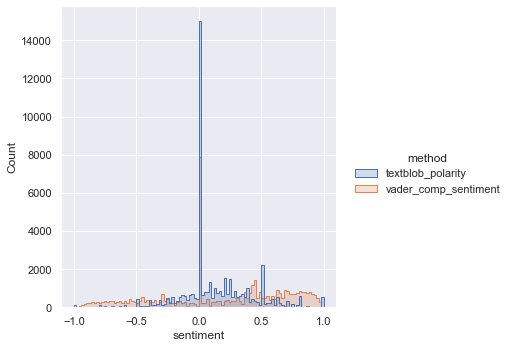

In [39]:
# comparison of textblob and vader sentiment distribution
sub = comments[['content', 'textblob_polarity', 'vader_comp_sentiment', 'date', 'handle', 'comment_len', 'word_count']]
pol_hist = sub.melt(id_vars=['content', 'date', 'handle', 'comment_len', 'word_count'], value_vars=['textblob_polarity', 'vader_comp_sentiment'], var_name='method', value_name='sentiment')
sns.displot(pol_hist, x="sentiment",hue="method", element="step")

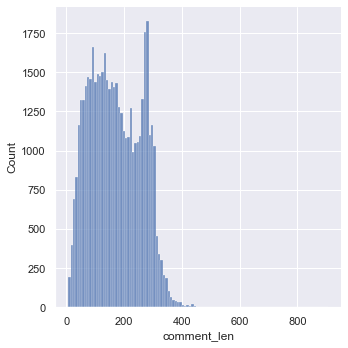

In [99]:
# comment_len 
only_textblob = pol_hist.query('method == "textblob_polarity"')
only_vader = pol_hist.query('method == "vader_comp_sentiment"')
sns.displot(only_textblob, x="comment_len")

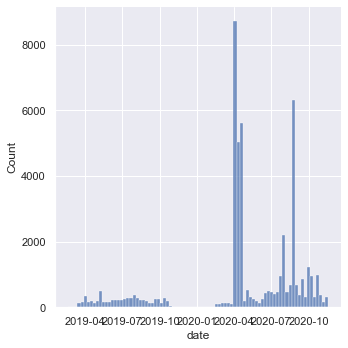

In [41]:
sns.displot(only_textblob, x="date")

In [42]:
# videos with highest and lowest sentiments 
# highest 
# lowest
comments.groupby('handle').mean()[['textblob_polarity']].sort_values(by=['textblob_polarity'], ascending=True)

,textblob_polarity
handle,
@casaraavo,-1.0
@mobileabed,-1.0
@jackthepug1304,-1.0
@BuggaCher81,-1.0
@Supreme_Court90,-1.0
...,...
@dips_mufc,1.0
@KristensenPaul,1.0
@Sabrina10786212,1.0


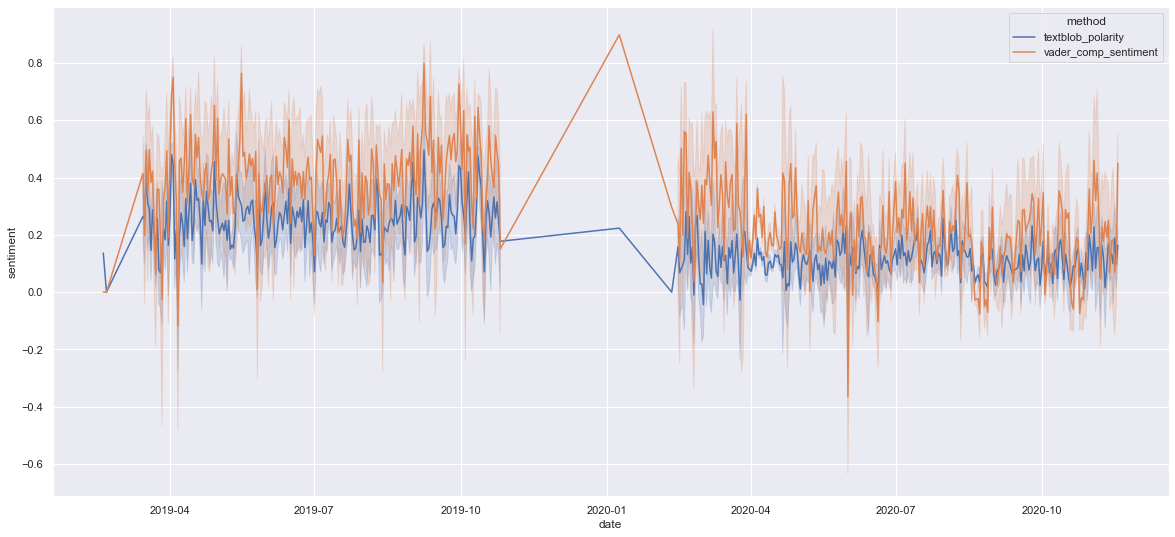

In [47]:
# sentiments over time 
sns.set(rc={'figure.figsize':(20,9)})
sns.lineplot(x="date", y="sentiment", hue="method", data=pol_hist)

In [48]:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
import scattertext
import spacy.cli
spacy.cli.download("en_core_web_lg")
import scattertext as st

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [49]:
nlp = spacy.load('en_core_web_lg')

In [50]:
corpus = st.CorpusFromPandas(only_textblob, category_col='handle', text_col='content', nlp=nlp).build()
# terms that differentiate text from background text 
print(list(corpus.get_scaled_f_scores_vs_background().index[:20]))

['masks', 'mask', 'covid', 'coronavirus', 'distancing', 'pandemic', 'attendants', 'wearing', 'passengers', 'wo', 'flight', 'ecredit', 'bailout', 'delta', 'snacks', 'skymiles', 'wear', 'attendant', 'enforcing', 'medallion']


In [52]:
#make new dataframe with only words using safe or safety 
safety = only_textblob[only_textblob.content.str.contains('safe|safety', regex=True)]
safety.head()

,content,date,handle,comment_len,word_count,method,sentiment
1,i think it’s safe to say i will NEVER fly with @delta again after such TERRIBLE customer service today from a SUPERVISOR. i have never in my life spoken to someone so rude.,2019-04-01,@NicoleGamboni,172,33,textblob_polarity,-0.240000
3,"I want to know that if a safety issue arises, they will be able to handle it. Telling us they are beautiful just reduces them from professionals to something to be visually enjoyed, and provides no value to the customers. Not trying to get anyone fired, but I hope @Delta 2/3",2019-04-01,@caffeineguru,275,51,textblob_polarity,0.616667
4,Delta Airlines proposes All-R.E.M.-song pre-flight safety video. Band to decide once it hears final mixes…potential songs. @Delta https://t.co/8GO0XUPkz1,2019-04-01,@remhq,153,18,textblob_polarity,0.000000
5,@Delta chooses to go straight up @Scoobydoo graphics for their safety video - “and I would have gotten away with it if it wasn’t for you darn kids” #scoobydoobydoo https://t.co/kxsmZxGihA,2019-04-01,@ChalkyATL,187,30,textblob_polarity,0.200000
6,@QuinnyPig @Delta @united Plus @delta has great safety films,2019-04-01,@CurtisJtaylor,60,9,textblob_polarity,0.800000


In [101]:
#create only negative safety now.
badsafety = safety[safety.sentiment< 0.000000]
badsafety.head()

,content,date,handle,comment_len,word_count,method,sentiment
1,i think it’s safe to say i will NEVER fly with @delta again after such TERRIBLE customer service today from a SUPERVISOR. i have never in my life spoken to someone so rude.,2019-04-01,@NicoleGamboni,172,33,textblob_polarity,-0.240000
391,@Delta But yet ATL TSA trays are FILTHY and never cleaned. Yet 100% of passengers have to touch them!! Sorry the airport is no safer than the weakest link and the TSA is not doing Delta any favors in Atlanta. They are putting lives at risk.,2020-04-01,@P100blue,240,46,textblob_polarity,-0.750000
800,"@RobertIrvine @Delta I can't picture anyone wanting to get you mad, unless they have a death wish. A scary thought , you upset enough to get mad. Hope you make it home, safe!",2019-08-01,@cornell_vickie,174,33,textblob_polarity,-0.225000
802,Always fun to have an early morning flight and get sat in a seat with a broken TV monitor. It could play the safety video but can’t load the in flight entertainment. #convenient @Delta #frustrated #annoyed,2019-08-01,@cmoviereview,205,36,textblob_polarity,-0.220000
813,"@Delta I sure hope something is done for me missing out on most of my trip to Greece!! I know things happen and pilots are human, and we also know that safety is paramount!! The thing is, if a pilot gets sick, what happens with co pilots? I hate losing MONEY!",2019-08-01,@AimingCenterMas,259,51,textblob_polarity,-0.105506


In [53]:
#find most common associations with content containing those words.
corpussafe = st.CorpusFromPandas(safety, category_col='handle', text_col='content', nlp=nlp).build()
# terms that differentiate text from background text 
print(list(corpussafe.get_scaled_f_scores_vs_background().index[:20]))

['covid', 'distancing', 'coronavirus', 'deltaairlines', 'wearamask', 'masks', 'attendants', 'safetyfirst', 'passengers', 'pandemic', 'sanitizer', 'bastian', 'covidiots', 'mask', 'flydelta', 'eulen', 'dtw', 'shoutout', 'airtravel', 'keepclimbing']


In [102]:
safelist = []
for sentence in badsafety.content:
    safelist.append(sentence)
    
sent_str = ""
for i in safelist:
    sent_str += str(i) + " "
sent_str = sent_str[:-1]



In [104]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

How many most common words to print: 40

OK. The 40 most common words are as follows

mask :  194
@mchooyah :  125
health :  103
one :  77
wear :  75
seat :  74
wearing :  70
take :  67
time :  67
don’t :  67
would :  65
travel :  62
need :  62
rules :  60
seriously :  59
seats :  57
care :  55
crew :  55
customer :  53
customers :  53
put :  52
make :  50
others :  49
keep :  48
 :  47
bad :  47
think :  46
video :  46
public :  45
never :  44
please :  44
want :  43
disappointed :  43
even :  43
know :  41
pandemic :  41
back :  40
go :  40
going :  40
taking :  40


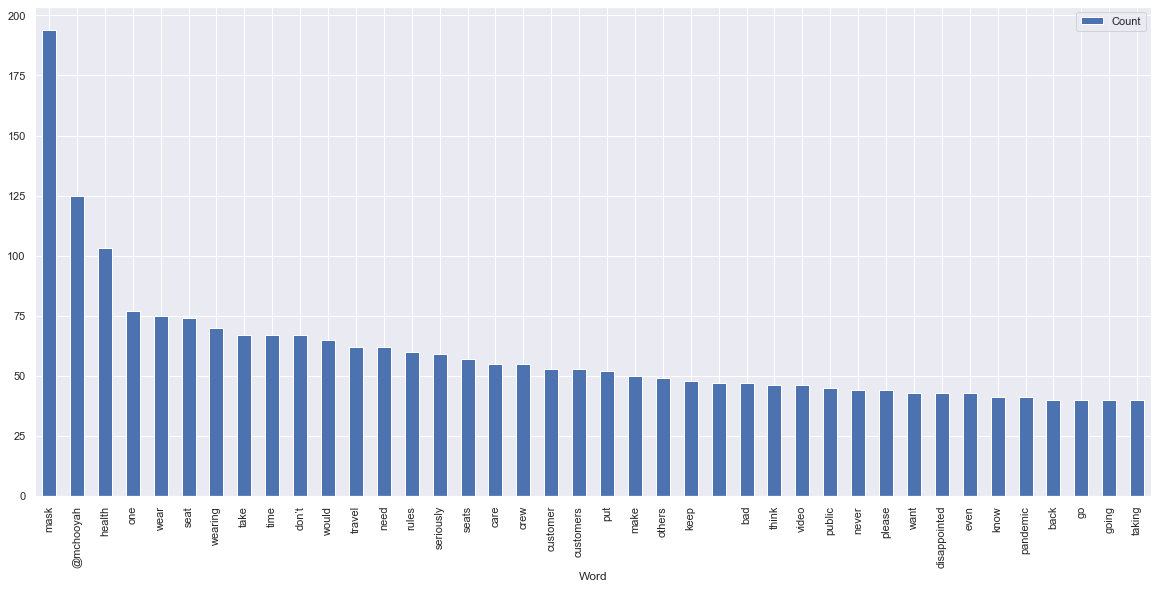

In [109]:
import collections
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
from nltk.corpus import stopwords
sw = stopwords.words("english")
othercommonwords = ['it’s', 'i’m', '&', 'flights','airline','@southwestair', "i'm", 'passenger', '-',' ', '@united', 'don’t' "@delta",'@delta', "safety", "safe", "flight", "delta", "thank", "passengers" , "& ", "fly" , "@americanair" , "people" , "us" , "flying" , "get" , "like", "airlines", "plane", "air", "fly", 'flight', 'covid', 'distancing', 'coronavirus', 'deltaairlines', 'wearamask', 'masks', 'attendants', 'safetyfirst', 'passengers', 'sanitizer', 'bastian', 'covidiots', 'flydelta', 'shoutout', 'airtravel', 'keepclimbing']
sw = sw + othercommonwords
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in sent_str.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in sw:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [ ]:
#get daily averages of text and vader, and then reset the indexes so its flattened into a dataframe that can be graphed
avg_day_type = pol_hist.groupby(['date', 'method']).mean()
avg_day_type.reset_index(level=['date','method'])

In [ ]:
# plot avg daily sentiments over time 
sns.set(rc={'figure.figsize':(20,9)})
sns.lineplot(x='date', y="sentiment", hue= 'method', data=avg_day_type)